<a href="https://colab.research.google.com/github/IagoLSJ/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sktime pmdarima numpy statsmodels matplotlib


  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)


In [ ]:
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.model_selection import temporal_train_test_split
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Dados de evasão da ufc de quixadá.csv')

In [ ]:
def parseToTimestamp(value):
    value = str(value)

    year, semester = value.split('.')

    year = int(year)

    month = 1 if int(semester) == 1 else 7

    return pd.Timestamp(year=year, month=month, day=1)

In [ ]:
df['Data'] = df['Semestre'].apply(parseToTimestamp)

In [ ]:
df = df.drop(columns=['Unidade', 'Tx. Retenção (Prazo Padrão)', 'Semestre'])
df.set_index('Data', inplace=True)
df['Taxa de Evasão'] = df['Taxa de Evasão'].str.rstrip('%').astype(float) / 100
df

,Taxa de Evasão
Data,
2013-01-01,0.122
2013-07-01,0.145
2014-01-01,0.144
2014-07-01,0.112
2015-01-01,0.095
2015-07-01,0.143
2016-01-01,0.076
2016-07-01,0.086
2017-01-01,0.070


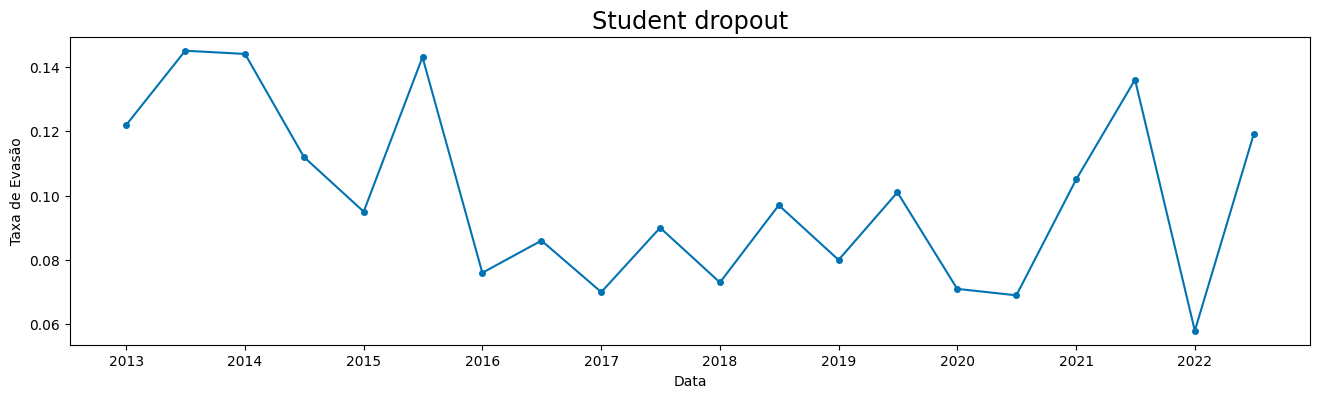

In [ ]:
plot_series(df, title='Student dropout', x_label='Data', y_label='Taxa de Evasão')
plt.show()